# Obtener dataset y primera vista 🐉

Voy a utilizar un dataset que tiene los datos sobre prácticamente todas las criaturas del juego de mesa Dungeons & Dragons.

Esto es un bestiario distribuido en varios libros con un total de 762 criaturas.

Las cualidades de estas criaturas están cuantificadas con diferentes caráterísticas con las cuales trabajaremos.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("./monsters.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                762 non-null    object 
 1   size                762 non-null    object 
 2   type                762 non-null    object 
 3   alignment           762 non-null    object 
 4   languages           762 non-null    object 
 5   ac                  762 non-null    float64
 6   hp                  762 non-null    int64  
 7   cr                  762 non-null    float64
 8   speed               762 non-null    int64  
 9   swim                762 non-null    int64  
 10  fly                 762 non-null    int64  
 11  climb               762 non-null    int64  
 12  burrow              762 non-null    int64  
 13  passive_perception  762 non-null    int64  
 14  darkvision          762 non-null    int64  
 15  truesight           762 non-null    int64  
 16  tremorse

Aquí tenemos las características, muchas son rebundantes por lo que las ignoraré.

Estas vienen siendo las principales:

- size: Tamaño categorico de la criatura
- type: Familia "biologica" a la que pertenece
- languages: Idiomas que la criatura conoce
- hp: Vitalidad de la criatura
- cr: Peligro/Amenaza que supone la criatura
- speed, fly, swim, climb, burrow: Difentes velocidades de la criatura
- strength, dex, con, wis, intel, cha: Capacidades de la criatura
- source: Libro donde aparece la criatura por primera vez
- legendary: Valor binario mostrando si la criatura es legendaria o no (Las criaturas legendarias son las mas relevantes en el mundo)

# Visualización de columnas principales

In [30]:
palette = "Set2"

## Variedad de tipos

In [31]:
df["type"].sample(5)

643    monstrosity (titan)
475                  fiend
694    humanoid (any race)
484                  beast
115                  beast
Name: type, dtype: object

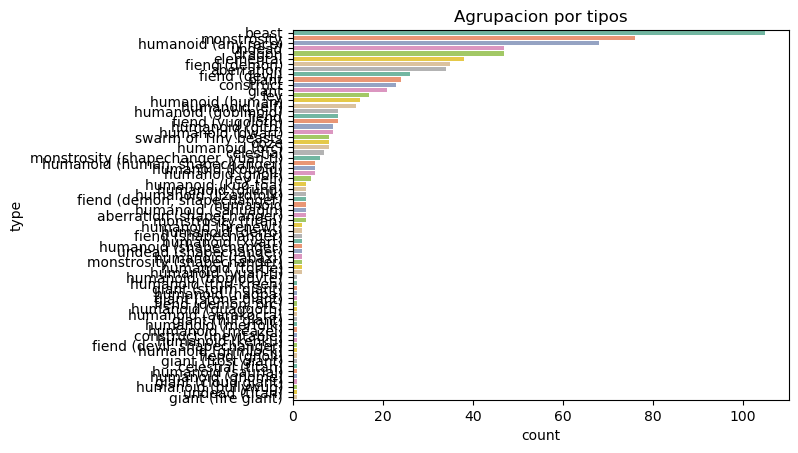

In [32]:
sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette=palette)
plt.title('Agrupacion por tipos')
plt.show()

Como podemos observar, los valores de tipo no solo indican su tipo primario, tambien su secundario, lo que nos impide ver bien los datos, para arreglarlo vamos a formatear los valores

In [33]:
def remove_subtypes(text):

  if "(" in text:
    return text[:text.index("(")].strip()
  else:
    return text.strip()

df['type'] = df['type'].apply(remove_subtypes)

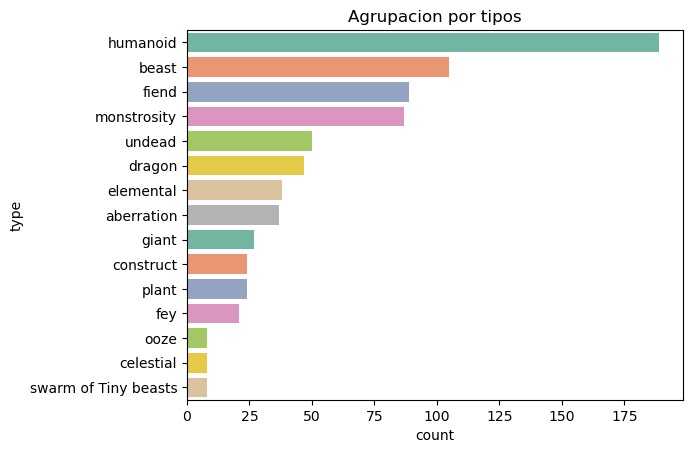

In [34]:
sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette=palette)
plt.title('Agrupacion por tipos')
plt.show()

Tenemos un bestiario bastante diversificado, encabezado por humanoides y bestias. Esto se debe a que los humanoides pueden ser de una misma raza, pero tener entradas diferentes. Es decir, un humano espadachin y un humano arquero cuentan como 2 seres diferentes

## Tamaños

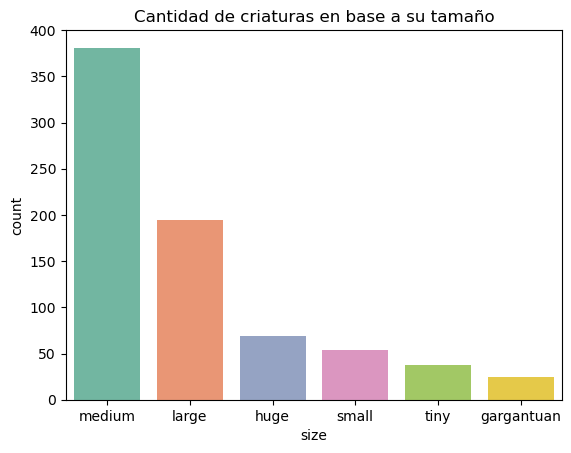

In [35]:
sns.countplot(data=df, x='size', order=df['size'].value_counts().index, palette=palette)
plt.title('Cantidad de criaturas en base a su tamaño')
plt.show()

Podemos ver como los tamaños medios son los predominantes, y los tamaños extremos, tanto como enano como gigante, son los mas escasos.

## Legendarios

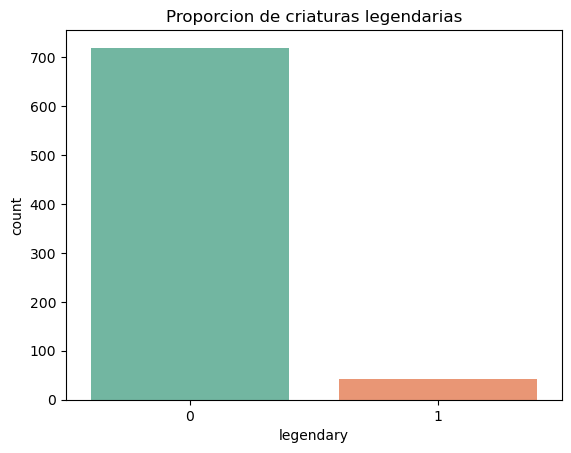

In [36]:
sns.countplot(data=df, x='legendary', order=df['legendary'].value_counts().index, palette=palette)
plt.title('Proporcion de criaturas legendarias')
plt.show()

Podemos obvservar como las criaturas legendarias no llegan ni a las 100 variedades. Esto es a su exclusividad en el mundo. Estas son criaturas mitologicás de capacidades extraordinarias

## Fuentes 📚

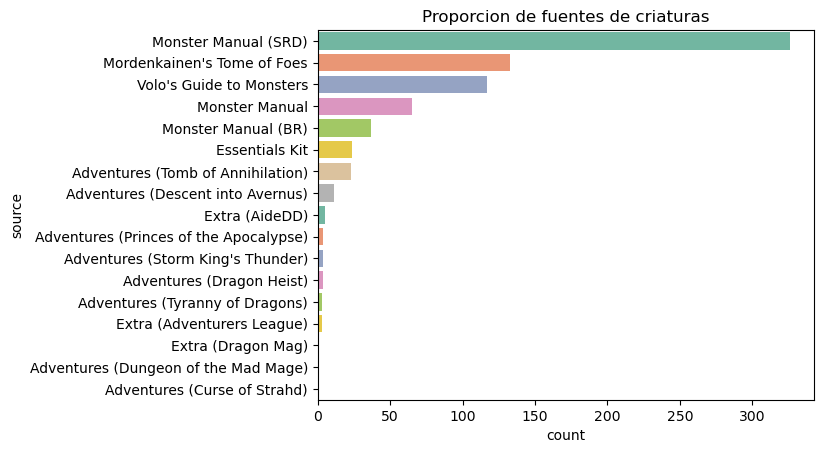

In [37]:
sns.countplot(data=df, y='source', order=df['source'].value_counts().index, palette=palette)
plt.title('Proporcion de fuentes de criaturas')
plt.show()

Aquí tenemos un problema similar al de tipo, donde las fuentes estan categorizadas 2 veces, para arreglarlo hacemos el mismo procedimiento que en el anterior caso

In [38]:
def format_sources(text):

  if "Extra" in text:
    return "Extra"
  if "Adventures" in text:
    return "Adventures"
  if "Monster Manual" in text:
    return "Monster Manual"
  else:
    return text.strip()

df['source'] = df['source'].apply(format_sources)

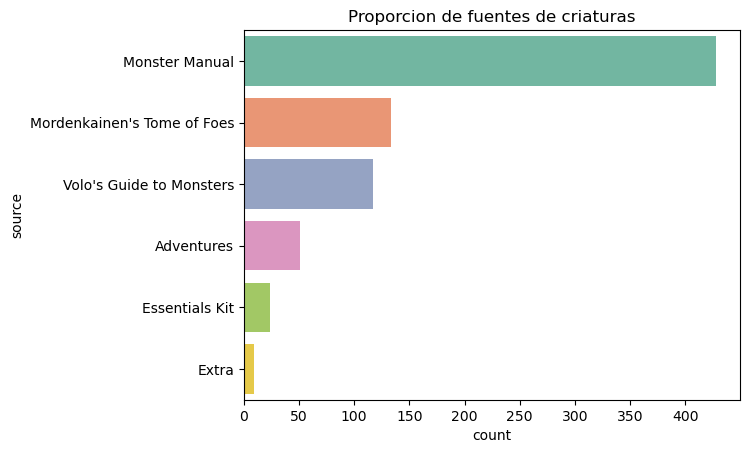

In [39]:
sns.countplot(data=df, y='source', order=df['source'].value_counts().index, palette=palette)
plt.title('Proporcion de fuentes de criaturas')
plt.show()

Vemos como Monster Manual, el primer y princiapal libro, tiene más entradas que la suma de todos los demás. Este le siguen "Mordekainen" y "Volo", los dos siguientes bestiarios.

## Nivel de peligro 🚫

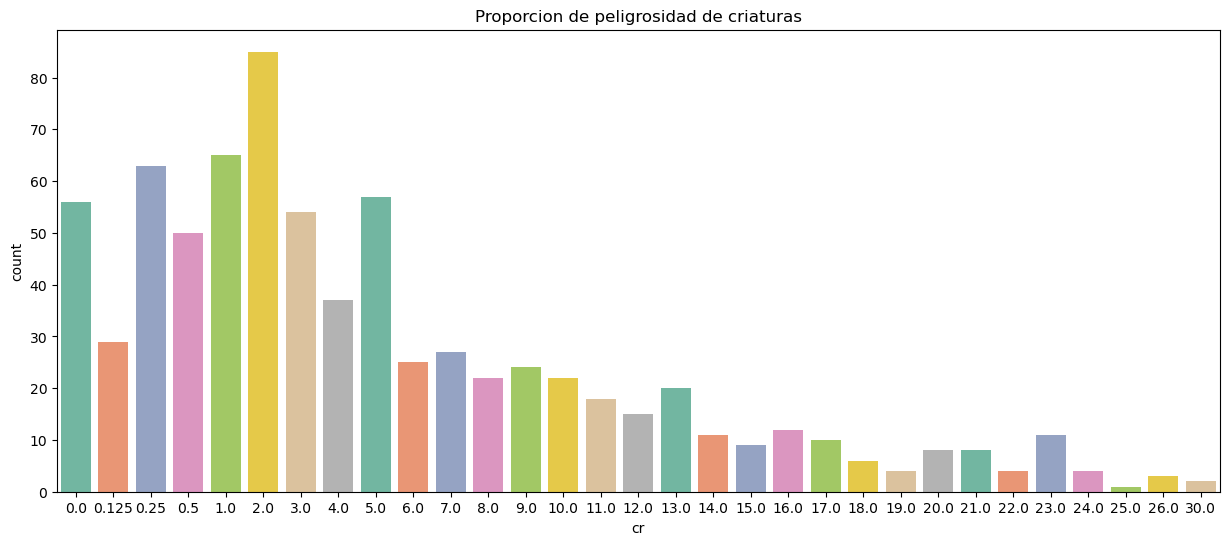

In [40]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df, x='cr', palette=palette)
plt.title('Proporcion de peligrosidad de criaturas')
plt.show()

Aquí tenemos la distribucion de peligro. Obviamente el grueso esta antes del nivel 5. Aquí se encuentran la mayoria de los humanoides y las bestias. Al igual qué en la jerarquía de depredación animal del mundo real. Los seres mas grandes y peligrosos son los mas escasos.

# Buscamos relaciones

## Peligro según el tipo

<Figure size 1200x600 with 0 Axes>

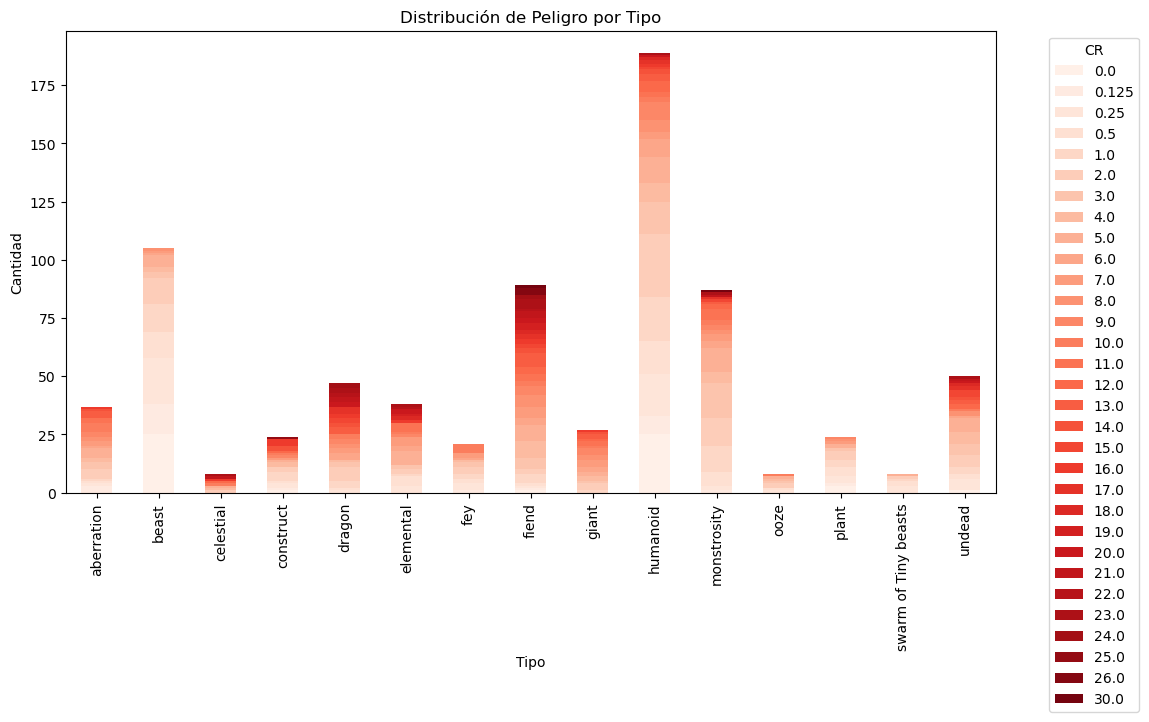

In [41]:
rating_counts = df.groupby(['type', 'cr']).size().unstack()

palette = sns.color_palette("Reds", len(rating_counts.columns))

plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=palette)

plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Distribución de Peligro por Tipo')

plt.legend(title='CR', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Queda claro con la anterior gráfica que ciertas familias de criaturas son más peligrosas que otras.

Familias que apenas presentan una amenza:
- beast
- plant
- ooze

Familias con variedad:
- humanoid
- monstrosity
- aberration

Familias en su mayoría altamente peligrosas:
- dragon
- fiend
- elemental


## ¿Como son las criaturas legendarias?

/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


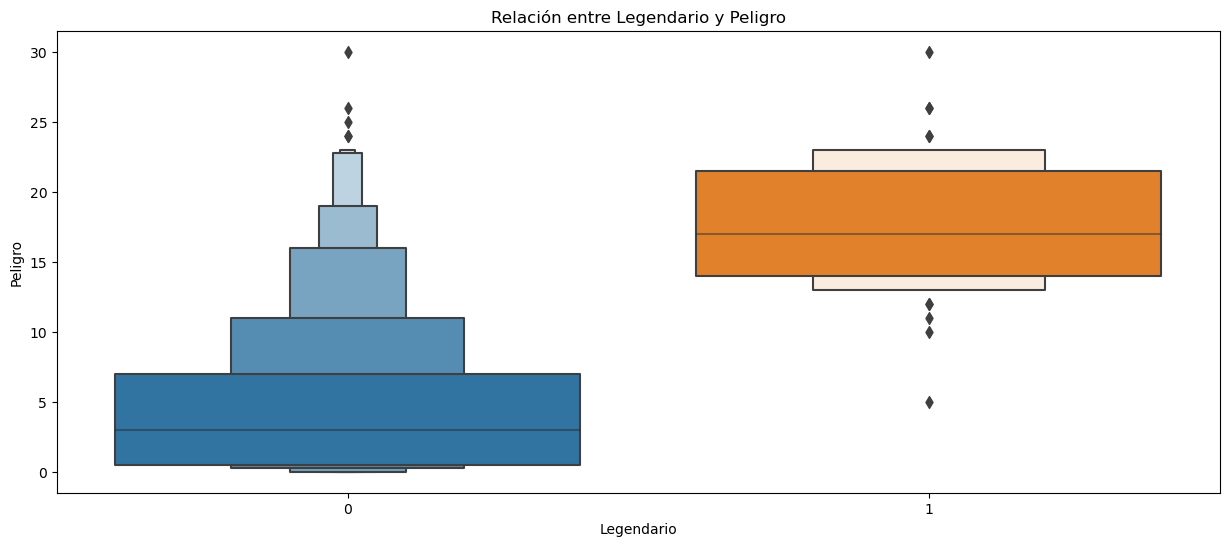

In [42]:
plt.figure(figsize=(15, 6))
sns.boxenplot(data=df, x='legendary', y='cr')

plt.xlabel('Legendario')
plt.ylabel('Peligro')
plt.title('Relación entre Legendario y Peligro')

plt.show()

Aquí también se demuestra como los seres legendarios son los principalmente más peligrosos, ya que su barra es practiamente la última parte de la barra de los seres no legendarios

## ¿Cuanto más inteligente/sabio más idiomas conoce? 🧠

In [43]:
df['languages'].sample(5)

66     understands Deep Speech, telepathy 1 mile
723                                 Goblin, Worg
450                   Abyssal, telepathy 120 ft.
660              Common, Druidic, Elvish, Sylvan
534                                         none
Name: languages, dtype: object

Tenemos la columna languages con una lista separada por comas de los idiomas conocidos. Con ella creamos una columna nueva que nos indique que numero conoce.

In [44]:
def count_languages(text):

  if "," in text:
    return text.count(",")+1
  elif "none" in text:
    return 0
  else:
    return 1

df['languages_count']= df['languages'].apply(count_languages)

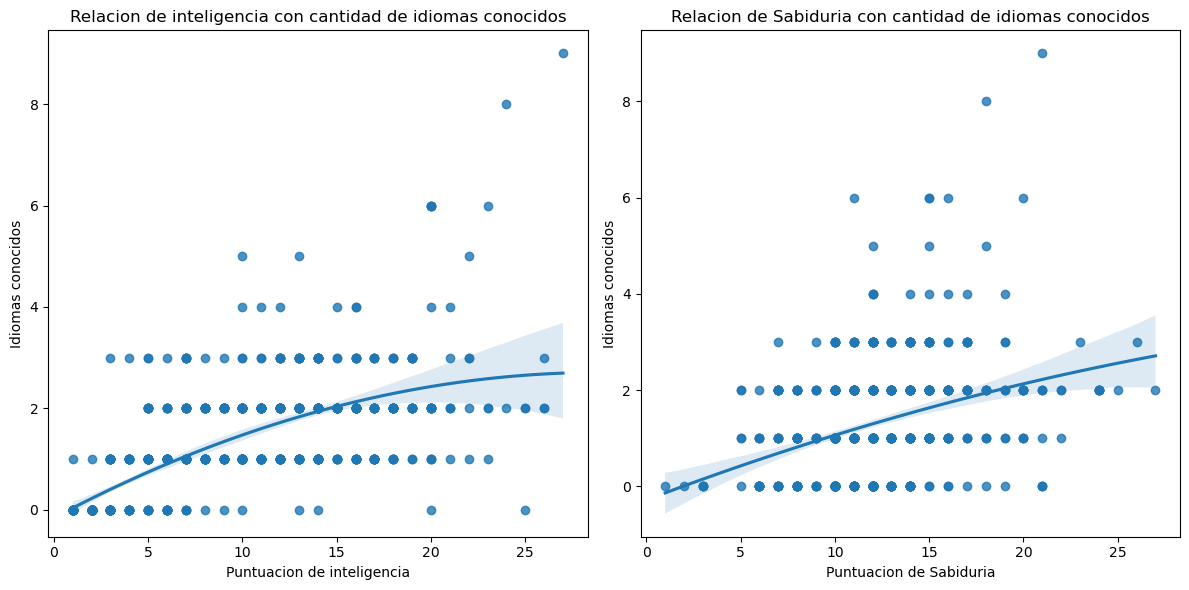

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.regplot(x=df["intel"], y=df["languages_count"], order=2, ax=axs[0])
axs[0].set_title('Relacion de inteligencia con cantidad de idiomas conocidos')
axs[0].set_xlabel('Puntuacion de inteligencia')
axs[0].set_ylabel('Idiomas conocidos')

sns.regplot(x=df["wis"], y=df["languages_count"], order=2, ax=axs[1])
axs[1].set_title('Relacion de Sabiduria con cantidad de idiomas conocidos')
axs[1].set_xlabel('Puntuacion de Sabiduria')
axs[1].set_ylabel('Idiomas conocidos')

plt.tight_layout()

plt.show()

Con esto concluimos que si, la cantidad de idiomas depende de su inteligencia y sabiduria, prácticamente por igual

## Demostración características -> peligro 🐲

Aqui demuestro como, la suma de todos las atributos es una relacion directamente proporcional con el peligro que una criatura supone

In [46]:
df["atr_sum"] = df["dex"]+df["con"]+df["intel"]+df["wis"]+df["cha"]+df["strength"]

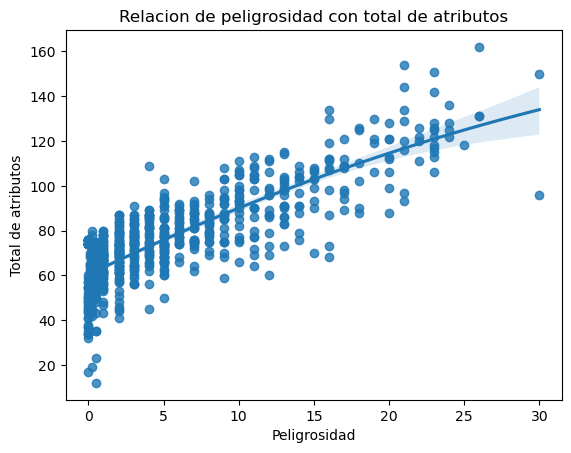

In [47]:
sns.regplot(x=df["cr"], y=df["atr_sum"], order=2)

plt.title('Relacion de peligrosidad con total de atributos')
plt.xlabel('Peligrosidad')
plt.ylabel('Total de atributos')

plt.show()

## Demostración tamaño -> salud 💗

Aqui demuestro que la salud y el tamaño tambien representan una representacion directa. Teniendo la mayor salud las criaturas gigantes y enormes y las mas reducida las criaturas pequeñas y enanas

<Figure size 1200x600 with 0 Axes>

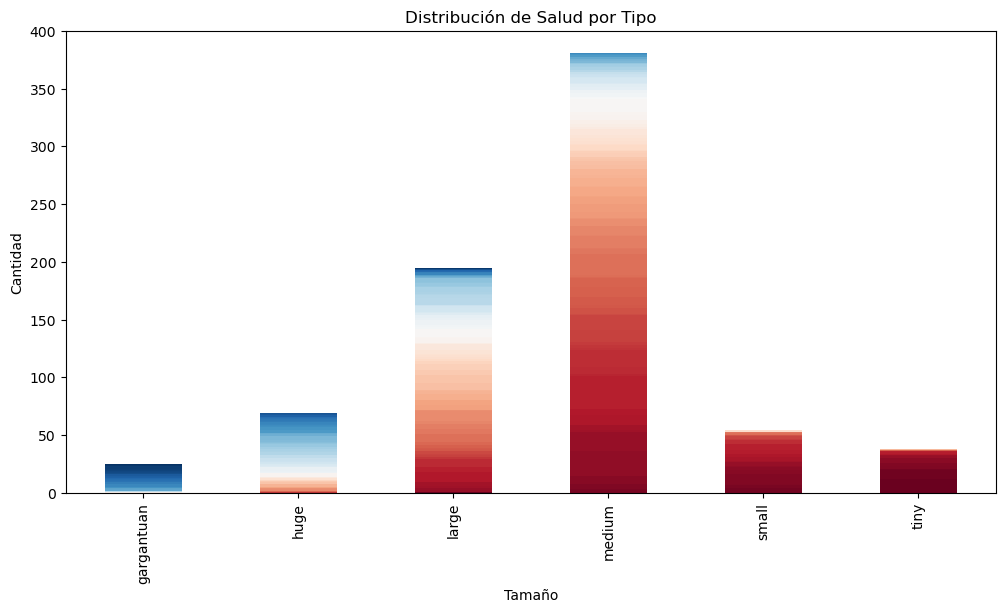

In [48]:
rating_counts = df.groupby(['size', 'hp']).size().unstack()

palette = sns.color_palette("RdBu", len(rating_counts.columns))

plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=palette, legend=False)

plt.xlabel('Tamaño')
plt.ylabel('Cantidad')
plt.title('Distribución de Salud por Tipo')

plt.show()

## El tamaño influye en la velocidad? 🏃

In [49]:
df[['speed', 'swim', 'fly', 'climb', 'burrow']].sample(5)

,speed,swim,fly,climb,burrow
690,60,0,0,0,0
539,30,0,50,0,0
21,25,0,0,0,0
271,30,0,0,0,10
547,30,0,0,0,0


In [50]:
df['top_speed'] = df[['speed', 'swim', 'fly', 'climb', 'burrow']].max(axis=1)

/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated

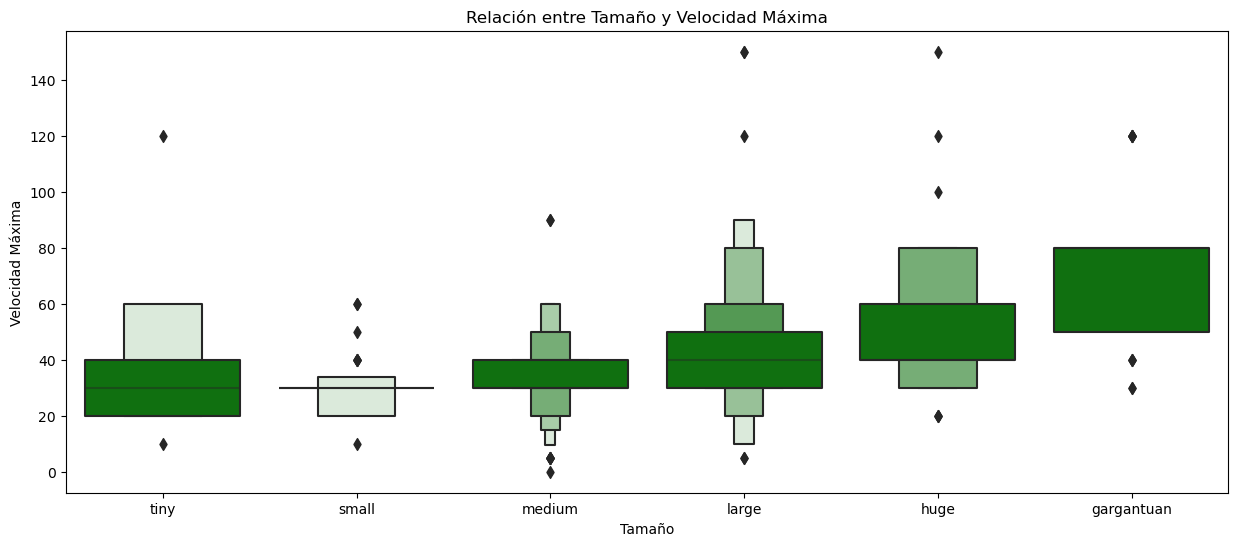

In [51]:
size_order = ['tiny', 'small', 'medium', 'large', 'huge', 'gargantuan']

plt.figure(figsize=(15, 6))
sns.boxenplot(data=df, x='size', y='top_speed', order=size_order, color="green")

plt.xlabel('Tamaño')
plt.ylabel('Velocidad Máxima')
plt.title('Relación entre Tamaño y Velocidad Máxima')

plt.show()

Tambien podemos conluir que si, cuanto mas grande la categoria de tamaño, la mayoria de sus criaturas tienen mayor cantidad de movimiento. Esto a execpcion de lás criaturas diminutas. Esto se debe a pajaros, hadas, diablillos... Criaturas voladoras que se mueven rápido para su tamaño

## Que añaden los libros extras? 📖

/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anxo/miniconda3/envs/data/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated

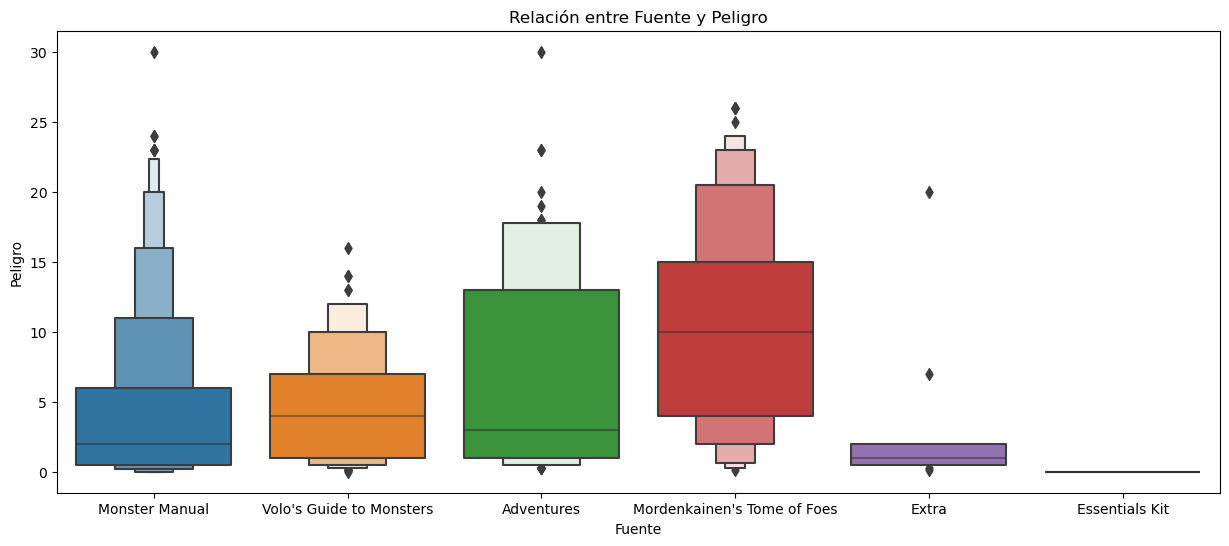

In [52]:
plt.figure(figsize=(15, 6))
sns.boxenplot(data=df, x='source', y='cr')

plt.xlabel('Fuente')
plt.ylabel('Peligro')
plt.title('Relación entre Fuente y Peligro')

plt.show()

Para concluir tenemos una muestra de que tipo de criaturas añaden los libros.

Podemos ver que:

- Monster Manual: Al ser el principal, añade una coleccion muy variada y estructurada de criaturas, de todas las dificultades, Siguiente el esquema global de mayor cantidad de criaturas debiles y menos de fuertes.

- Volo: Sigue el ejemplo del anterior, al ser el siguiente en fecha de salida, añadió mas variedad de criaturas débiles e intermedias.

- Adventures: Las aventuras añaden más cantidad de criaturas poderosas. Esto se debe a que los enemigos caracteristicos de estas aventuras (Jefe finales) deben ser poderosos.

- Mordekainen: El ultimo bestiario, añade aun mas criaturas de gran dificultad. Esto debido a la peticion de los usuarios de mas enemigos poderosos y jefes finales a los que enfrentarse y en los cuales basar sus historias

- Extra: Aquí tenemos casi de forma exclusiva criaturas extremadamente debiles. Esto se debe a que traian mas criaturas para darambiente (animales) que enemigos a los que enfrentarse.

## ¿Está la Constitución realmente relacionada a la salud?

Se supone que la constitución es la característica fisica relacionada a la salud, por lo que deberia ser la que mas escala en cuanto a la salud de los enemigos. Veamos si es asi

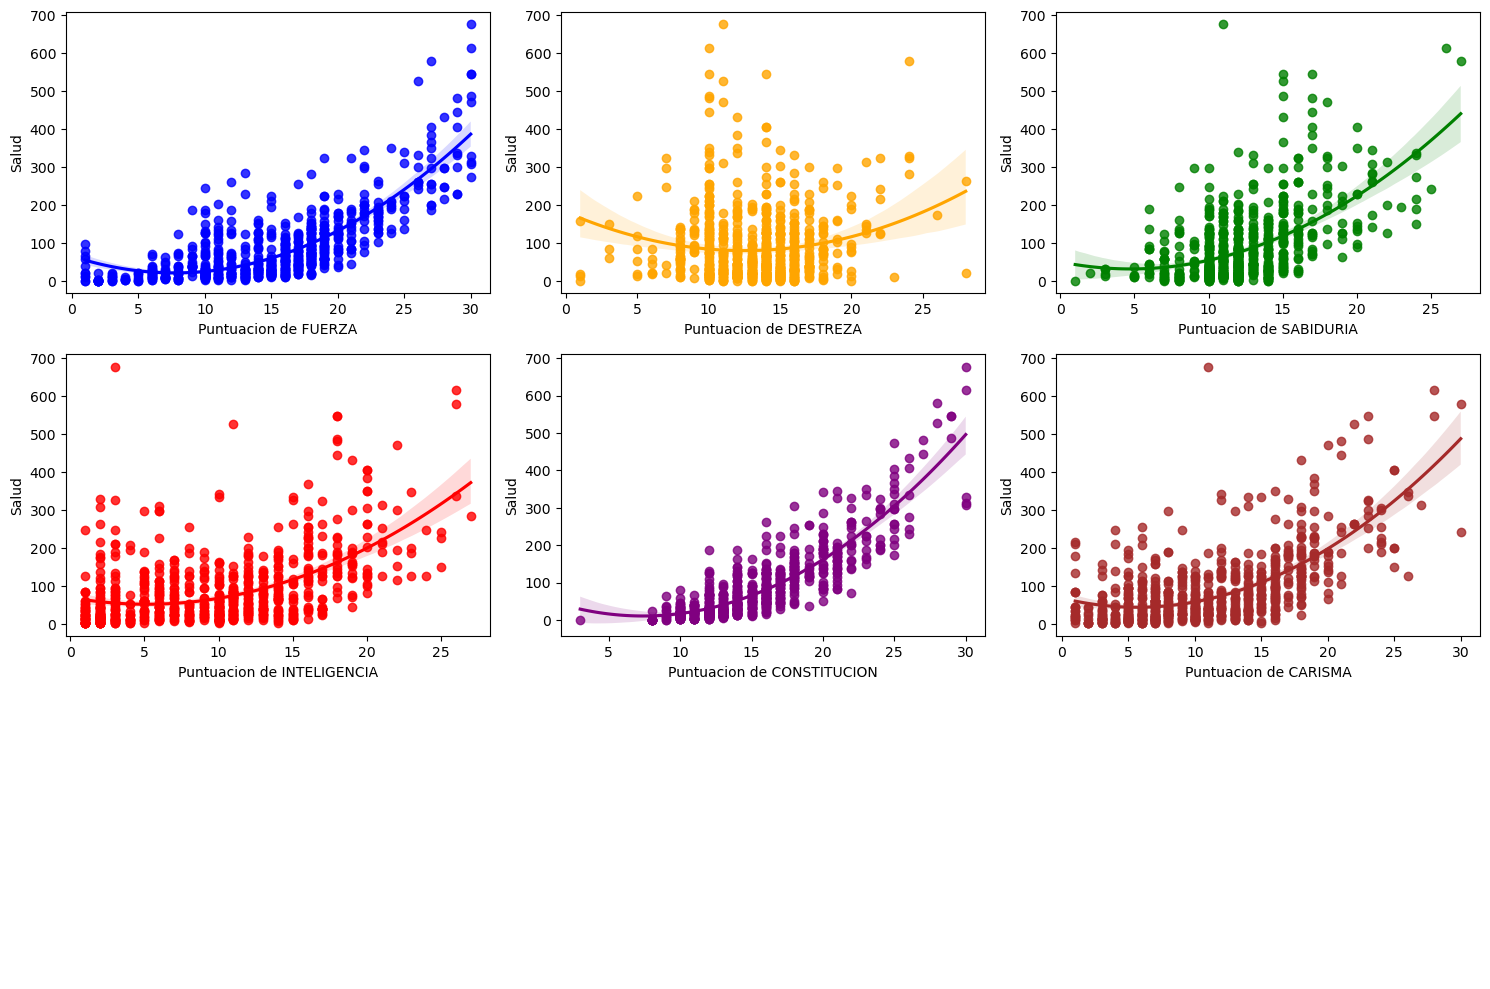

In [53]:
colores = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
target_y = df["hp"]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

sns.regplot(x=df["strength"], y=target_y, order=2, ax=axs[0, 0], color=colores[0])
axs[0, 0].set_xlabel('Puntuacion de FUERZA')
axs[0, 0].set_ylabel('Salud')

sns.regplot(x=df["dex"], y=target_y, order=2, ax=axs[0, 1], color=colores[1])
axs[0, 1].set_xlabel('Puntuacion de DESTREZA')
axs[0, 1].set_ylabel('Salud')

sns.regplot(x=df["wis"], y=target_y, order=2, ax=axs[0, 2], color=colores[2])
axs[0, 2].set_xlabel('Puntuacion de SABIDURIA')
axs[0, 2].set_ylabel('Salud')

sns.regplot(x=df["intel"], y=target_y, order=2, ax=axs[1, 0], color=colores[3])
axs[1, 0].set_xlabel('Puntuacion de INTELIGENCIA')
axs[1, 0].set_ylabel('Salud')

sns.regplot(x=df["con"], y=target_y, order=2, ax=axs[1, 1], color=colores[4])
axs[1, 1].set_xlabel('Puntuacion de CONSTITUCION')
axs[1, 1].set_ylabel('Salud')

sns.regplot(x=df["cha"], y=target_y, order=2, ax=axs[1, 2], color=colores[5])
axs[1, 2].set_xlabel('Puntuacion de CARISMA')
axs[1, 2].set_ylabel('Salud')

for ax in axs[2, :]:
    ax.axis('off')

plt.tight_layout()
plt.show()


Como podemos ver, aun que sea de la que más relacionada esta con la salud, realmente esta igualada con CARISMA y se acerca mucho a SABIDURIA